# Feature Description
1. Survived: If the passenger survived(0-No, 1-Yes)

2. Pelass Passenger Class (1 = 1", 2= 2", 3= 3")

3. Sex : (male, female)
   
4. Age: Passenger age in years

5. SibSp: No of siblingyspouses aboard

6. Parch: No of parents/children aboard

7. Fare: Passenger Fare

8. who : (Child, Woman, Man)

9. Embarked_Town : Embarked Town

10. Alone : True of False

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report

# Load Data

In [2]:
df = pd.read_csv('data/titanic.csv')

In [3]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,who,embark_town,alone
0,True,3,male,0.42,0,1,8.5167,child,Cherbourg,False
1,True,2,male,0.67,1,1,14.5000,child,Southampton,False
2,True,3,female,0.75,2,1,19.2583,child,Cherbourg,False
3,True,3,female,0.75,2,1,19.2583,child,Cherbourg,False
4,True,2,male,0.83,1,1,18.7500,child,Southampton,False


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     889 non-null    bool   
 1   pclass       889 non-null    int64  
 2   sex          889 non-null    object 
 3   age          889 non-null    float64
 4   sibsp        889 non-null    int64  
 5   parch        889 non-null    int64  
 6   fare         889 non-null    float64
 7   who          889 non-null    object 
 8   embark_town  889 non-null    object 
 9   alone        889 non-null    bool   
dtypes: bool(2), float64(2), int64(3), object(3)
memory usage: 57.4+ KB


# Exploratory Data Analysis

In [5]:
df_num = df.select_dtypes(include=['int64', 'float64'])
df_cat = df.select_dtypes(include=['bool', 'object'])
df_num['survived'] = df['survived']

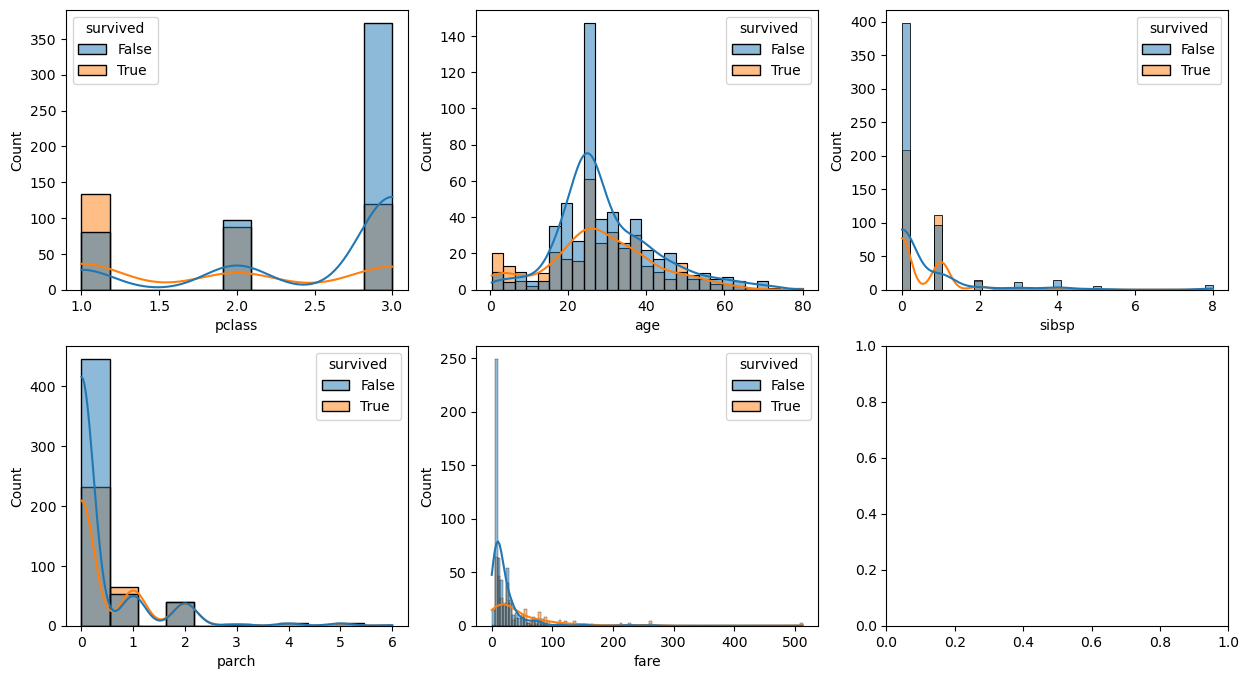

In [6]:
fig, axes = plt.subplots(2,3, figsize=(15,8))

row, col = 0,0

for i in df_num.drop(columns=['survived']):
    if col < 3:
        sns.histplot(data=df_num, x=i, hue='survived', kde=True, ax=axes[row][col])
        col+=1
    else:
        row+=1
        col=0
        sns.histplot(data=df_num, x=i, hue='survived', kde=True, ax=axes[row][col])
        col+=1

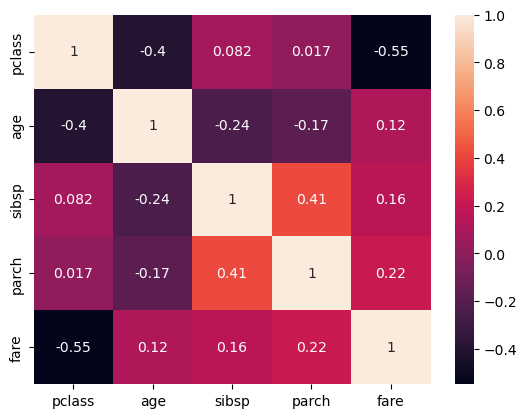

In [7]:
sns.heatmap(df_num.drop(columns=['survived']).corr(), annot=True)
plt.show()

In [8]:
df_num.drop(columns=['survived']).describe()

,pclass,age,sibsp,parch,fare
count,889.000000,889.000000,889.000000,889.000000,889.000000
mean,2.311586,29.218414,0.524184,0.382452,32.096681
std,0.834700,13.178017,1.103705,0.806761,49.697504
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,22.000000,0.000000,0.000000,7.895800
50%,3.000000,26.000000,0.000000,0.000000,14.454200
75%,3.000000,36.500000,1.000000,0.000000,31.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200


### Based on the above plots and descriptive statistics, we can conclude:
> 1. All features has distribution skewness (non normal distribution).
> 2. The largest correlation between features is shown by sibsp with parch at 0.41.
> 3. pclass (passengers class) mean = 2.31, min =  1, max = 3.
> 4. age mean = 29.2, min = 0.42, max = 80.
> 5. sibsp(siblingyspouses aboard) mean = 0.52, min = 0, max = 8.
> 6. parch(parents/children aboard) mean = 0.38, min = 0, max = 6.
> 7. fare mean = 32, min = 0, max = 512.

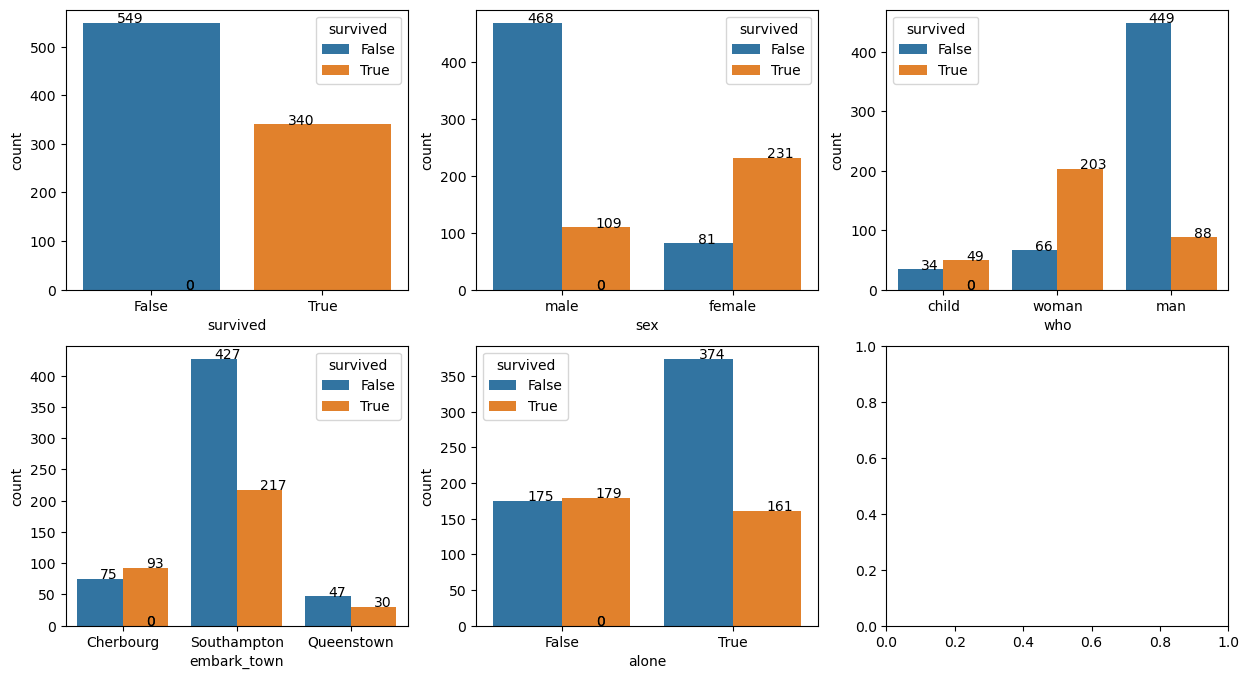

In [9]:
fig, axes= plt.subplots(2, 3, figsize=(15,8))
col = 0
row = 0

for i in df_cat:
    if col < 3:
        z = sns.countplot(data=df_cat, x=i, hue='survived', ax=axes[row][col])
        for p in z.patches:
            z.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()+0.02))
        col+=1
        
    else:
        row+=1
        col=0
        z = sns.countplot(data=df_cat, x=i, hue='survived', ax=axes[row][col])
        for p in z.patches:
            z.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()+0.02))
        col+=1

### Based on the above plot, we can conclude:
> 1. 549 Passengers not survive and 320 survive.
> 2. 468 male not survive and 109 male surivive, 81 female not survive and 231 female survive.
> 3. 24 child not survive and 49 child survive, 66 woman not survive and 203 woman survive, 449 man not survive and 88 man survive.
> 4. 75 passengers who embark at cherbourg not survive and 93 who embark at chrbourg wurvive, 427 who embark at southampton not survive and 217 who embark at suthampton survive, 47 passengers who embark at queenstown not survive and 30 passengers who embark at queenstown survive. 
> 5. 175 passengers who not alone not survive and 179 passengers who not alone survived, 374 passengers who alone not survived and 161 passengers who alone survive.

# Feature Engineering

## One Hot Encoding

In [10]:
df= pd.get_dummies(df, columns=['who', 'embark_town'])

In [11]:
df=pd.get_dummies(df, columns=['sex', 'alone'], drop_first=True)

## Ordinal Encoding

In [12]:
pclass_order = [3,2,1]
df['pclass_enc'] = OrdinalEncoder().fit_transform(df[['pclass']])
df = df.drop(columns=['pclass'])

## Target Encoding

In [13]:
df['survived'] = LabelEncoder().fit_transform(df['survived'])

## Feature Scalling

In [14]:
scalar = MinMaxScaler()

for i in df_num.drop(columns=['survived', 'pclass']):
    df[i] = scalar.fit_transform(df[[i]])

## Feature Selection

In [15]:
from sklearn.ensemble import ExtraTreesClassifier

In [16]:
X = df.drop(columns=['survived'])
y = df['survived']

[0.21271557 0.04722589 0.02924194 0.22905957 0.01648491 0.14229709
 0.06943279 0.01274106 0.00647508 0.01061097 0.10071297 0.01341845
 0.10958369]


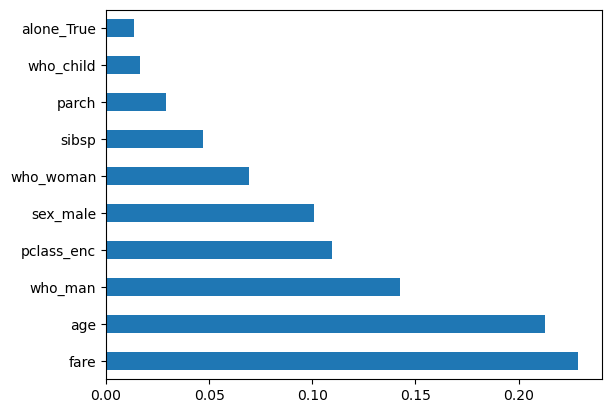

In [17]:
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [18]:
features = feat_importances.nlargest(10).index

In [19]:
df_slc = df[features]
df_slc['survived'] = df['survived']

C:\Users\brian\AppData\Local\Temp\ipykernel_12640\2111219274.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_slc['survived'] = df['survived']


# Modelling

## ANN

In [20]:
import tensorflow as tf

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X = df_slc.drop(columns=['survived'])
y = df_slc['survived']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [24]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(input_shape=[10], units=20, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


C:\Users\brian\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [25]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 20)                  │             220 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             210 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 441 (1.72 KB)

 Trainable params: 441 (1.72 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
model.compile(optimizer='adam', metrics=['acc'], loss='binary_crossentropy')
history = model.fit(X_train,y_train, epochs=100, validation_data=(X_test, y_test), shuffle=True)

Epoch 1/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - acc: 0.3682 - loss: 0.7933 - val_acc: 0.4494 - val_loss: 0.6959
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.5999 - loss: 0.6773 - val_acc: 0.8090 - val_loss: 0.6276
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.7600 - loss: 0.6249 - val_acc: 0.8034 - val_loss: 0.5818
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.7969 - loss: 0.5806 - val_acc: 0.8090 - val_loss: 0.5430
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.7899 - loss: 0.5367 - val_acc: 0.7978 - val_loss: 0.5087
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.8205 - loss: 0.5102 - val_acc: 0.7921 - val_loss: 0.4813
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.8002 - loss: 0.4933 - val_acc: 0.7921 - val_loss: 0.4605
Epoch 8/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.7920 - loss: 0.4748 - val_acc: 0.7865 - val_loss: 0.4458
Epoch 9/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.775

In [27]:
y_pred = model.predict(X_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


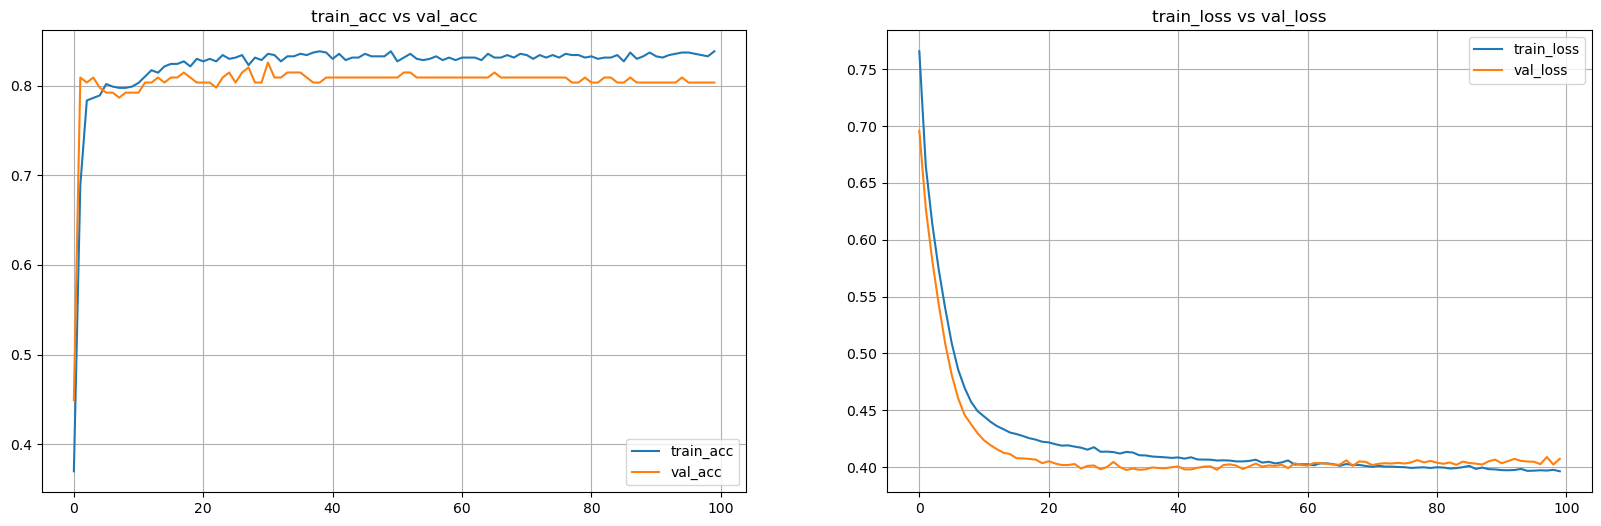

In [28]:
fig, axes = plt.subplots(1,2, figsize=[20,6])
sns.lineplot(data=history.history['acc'], ax=axes[0], label='train_acc')
sns.lineplot(data=history.history['val_acc'], ax=axes[0], label='val_acc')
axes[0].set_title('train_acc vs val_acc')


sns.lineplot(data=history.history['loss'], ax=axes[1], label='train_loss')
sns.lineplot(data=history.history['val_loss'], ax=axes[1], label='val_loss')
axes[1].set_title('train_loss vs val_loss')


axes[0].grid(True)
axes[1].grid(True)
plt.show()

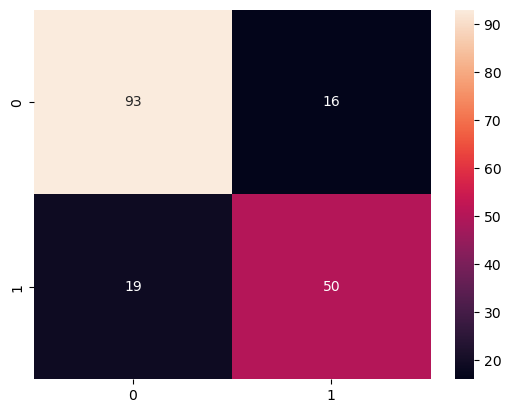

In [29]:
sns.heatmap(confusion_matrix(y_test,tf.round(y_pred)), annot=True)
plt.show()

In [30]:
print(classification_report(y_test,tf.round(y_pred)))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84       109
           1       0.76      0.72      0.74        69

    accuracy                           0.80       178
   macro avg       0.79      0.79      0.79       178
weighted avg       0.80      0.80      0.80       178



### Based on the above results
> 1. Train accuracy is in range 83% - 84%.
> 2. Validation accuracy is in range 80% - 81%.
> 3. Train loss is in range 75% - 39%.
> 4. Validation accuracy is in range 70% - 42.5%.
> 5. At classification report show that accuracy of that model is 80%.
> 6. Model is not overfit or underfit.

# Conclusion
> 1. All features has distribution skewness (non normal distribution).
> 2. The largest correlation between features is shown by sibsp with parch at 0.41.
> 3. pclass (passengers class) mean = 2.31, min =  1, max = 3.
> 4. age mean = 29.2, min = 0.42, max = 80.
> 5. sibsp(siblingyspouses aboard) mean = 0.52, min = 0, max = 8.
> 6. parch(parents/children aboard) mean = 0.38, min = 0, max = 6.
> 7. fare mean = 32, min = 0, max = 582.
> 1. 549 Passengers not survive and 320 surv9ve.
> 2. 468 male not survive and 109 male surivive, 81 female not survive and 231 female sur10ive.
> 3. 24 child not survive and 49 child survive, 66 woman not survive and 203 woman survive, 449 man not survive and 88 man su11vive.
> 4. 75 passengers who embark at cherbourg not survive and 93 who embark at chrbourg wurvive, 427 who embark at southampton not survive and 217 who embark at suthampton survive, 47 passengers who embark at queenstown not survive and 30 passengers who embark at queenstown su12vive. 
> 5. 175 passengers who not alone not survive and 179 passengers who not alone survived, 374 passengers who alone not survived and 161 passengers who alo
> 13. Train accuracy is in range 83% - 84%.
> 14. Validation accuracy is in range 80% - 81%.
> 15. Train loss is in range 75% - 39%.
> 16. Validation accuracy is in range 70% - 42.5%.
> 17. At classification report show that accuracy of that model is 80%.
> 18. Model is not overfit or underfit.ne survive.